In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice


In [2]:

import warnings
warnings.filterwarnings('ignore')

np.random.seed(0)

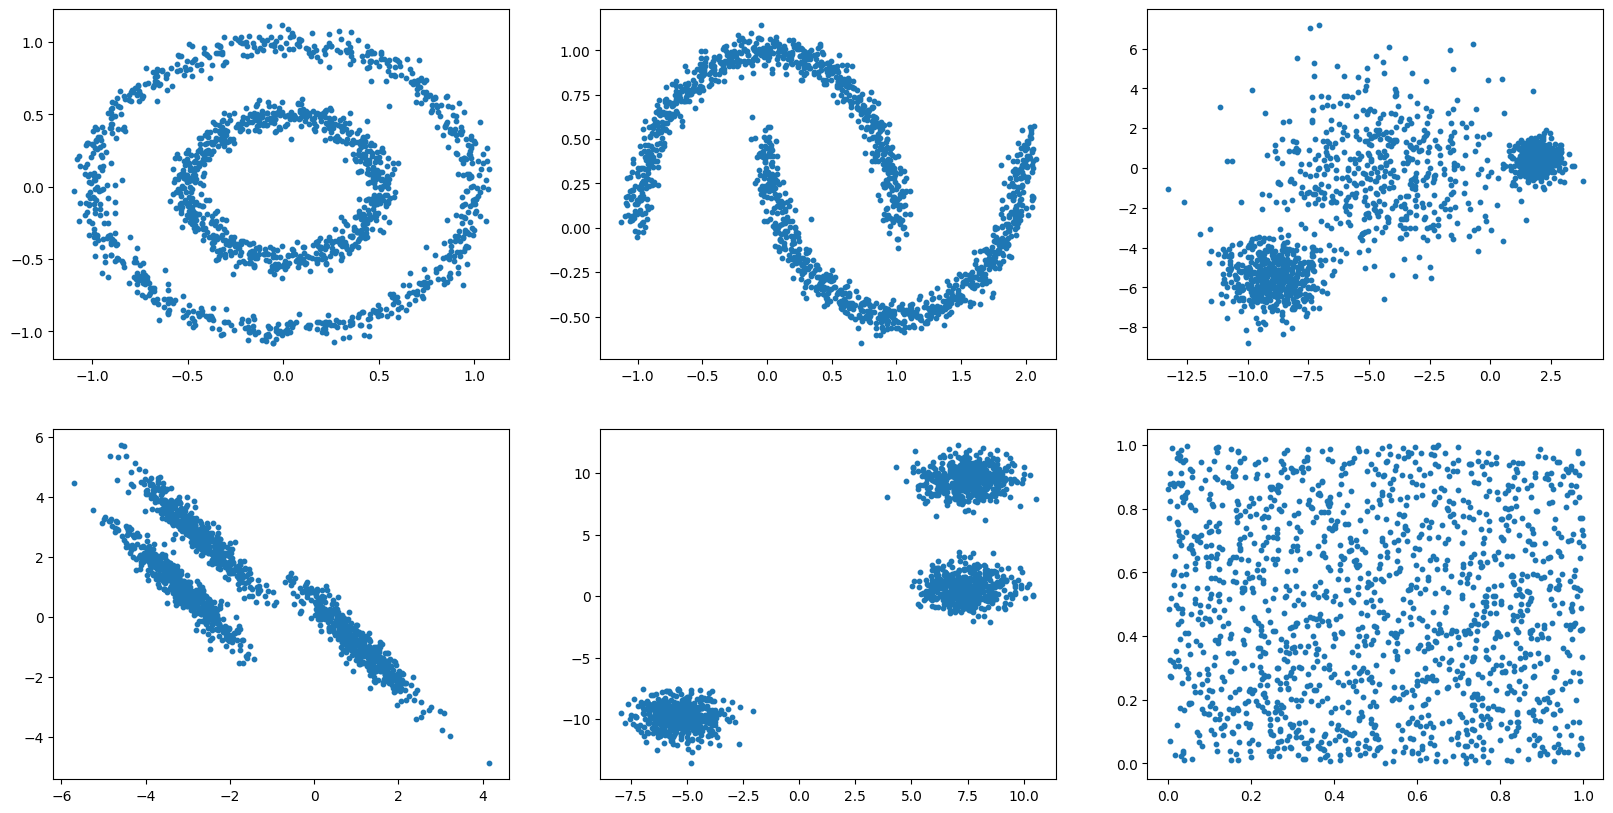

<Figure size 2100x1250 with 0 Axes>

In [3]:
#%%
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
# 6 datasets.
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)

#%%
# ============
# Set up cluster parameters
# ============
plot_num = 1

default_base = {'n_clusters': 3}

datasets_ls = [
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (varied, {}),
    (aniso, {}),
    (blobs, {}),
    (no_structure, {})]

#%%
fig = plt.figure(figsize=(20,10))

for i_dataset, (dataset, algo_params) in enumerate(datasets_ls):
    X, y = dataset
    plt.subplot(2, 3, i_dataset+1)
    plt.scatter(X[:, 0], X[:, 1], s=10)
# plt.show()


#%%
plt.figure(figsize=(9 * 2 + 3, 12.5))
# plt.figure(figsize=(20 * 2 + 3, 30))

plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05, hspace=.01)
#%%

In [4]:
noisy_circles

(array([[-0.67799938, -0.69875698],
        [ 0.93143746,  0.19139133],
        [ 0.54829131, -0.00601715],
        ...,
        [-0.34518816, -0.35804797],
        [ 0.01719727, -0.94513802],
        [ 0.91377877, -0.59884164]], shape=(1500, 2)),
 array([0, 0, 1, ..., 1, 0, 0], shape=(1500,)))

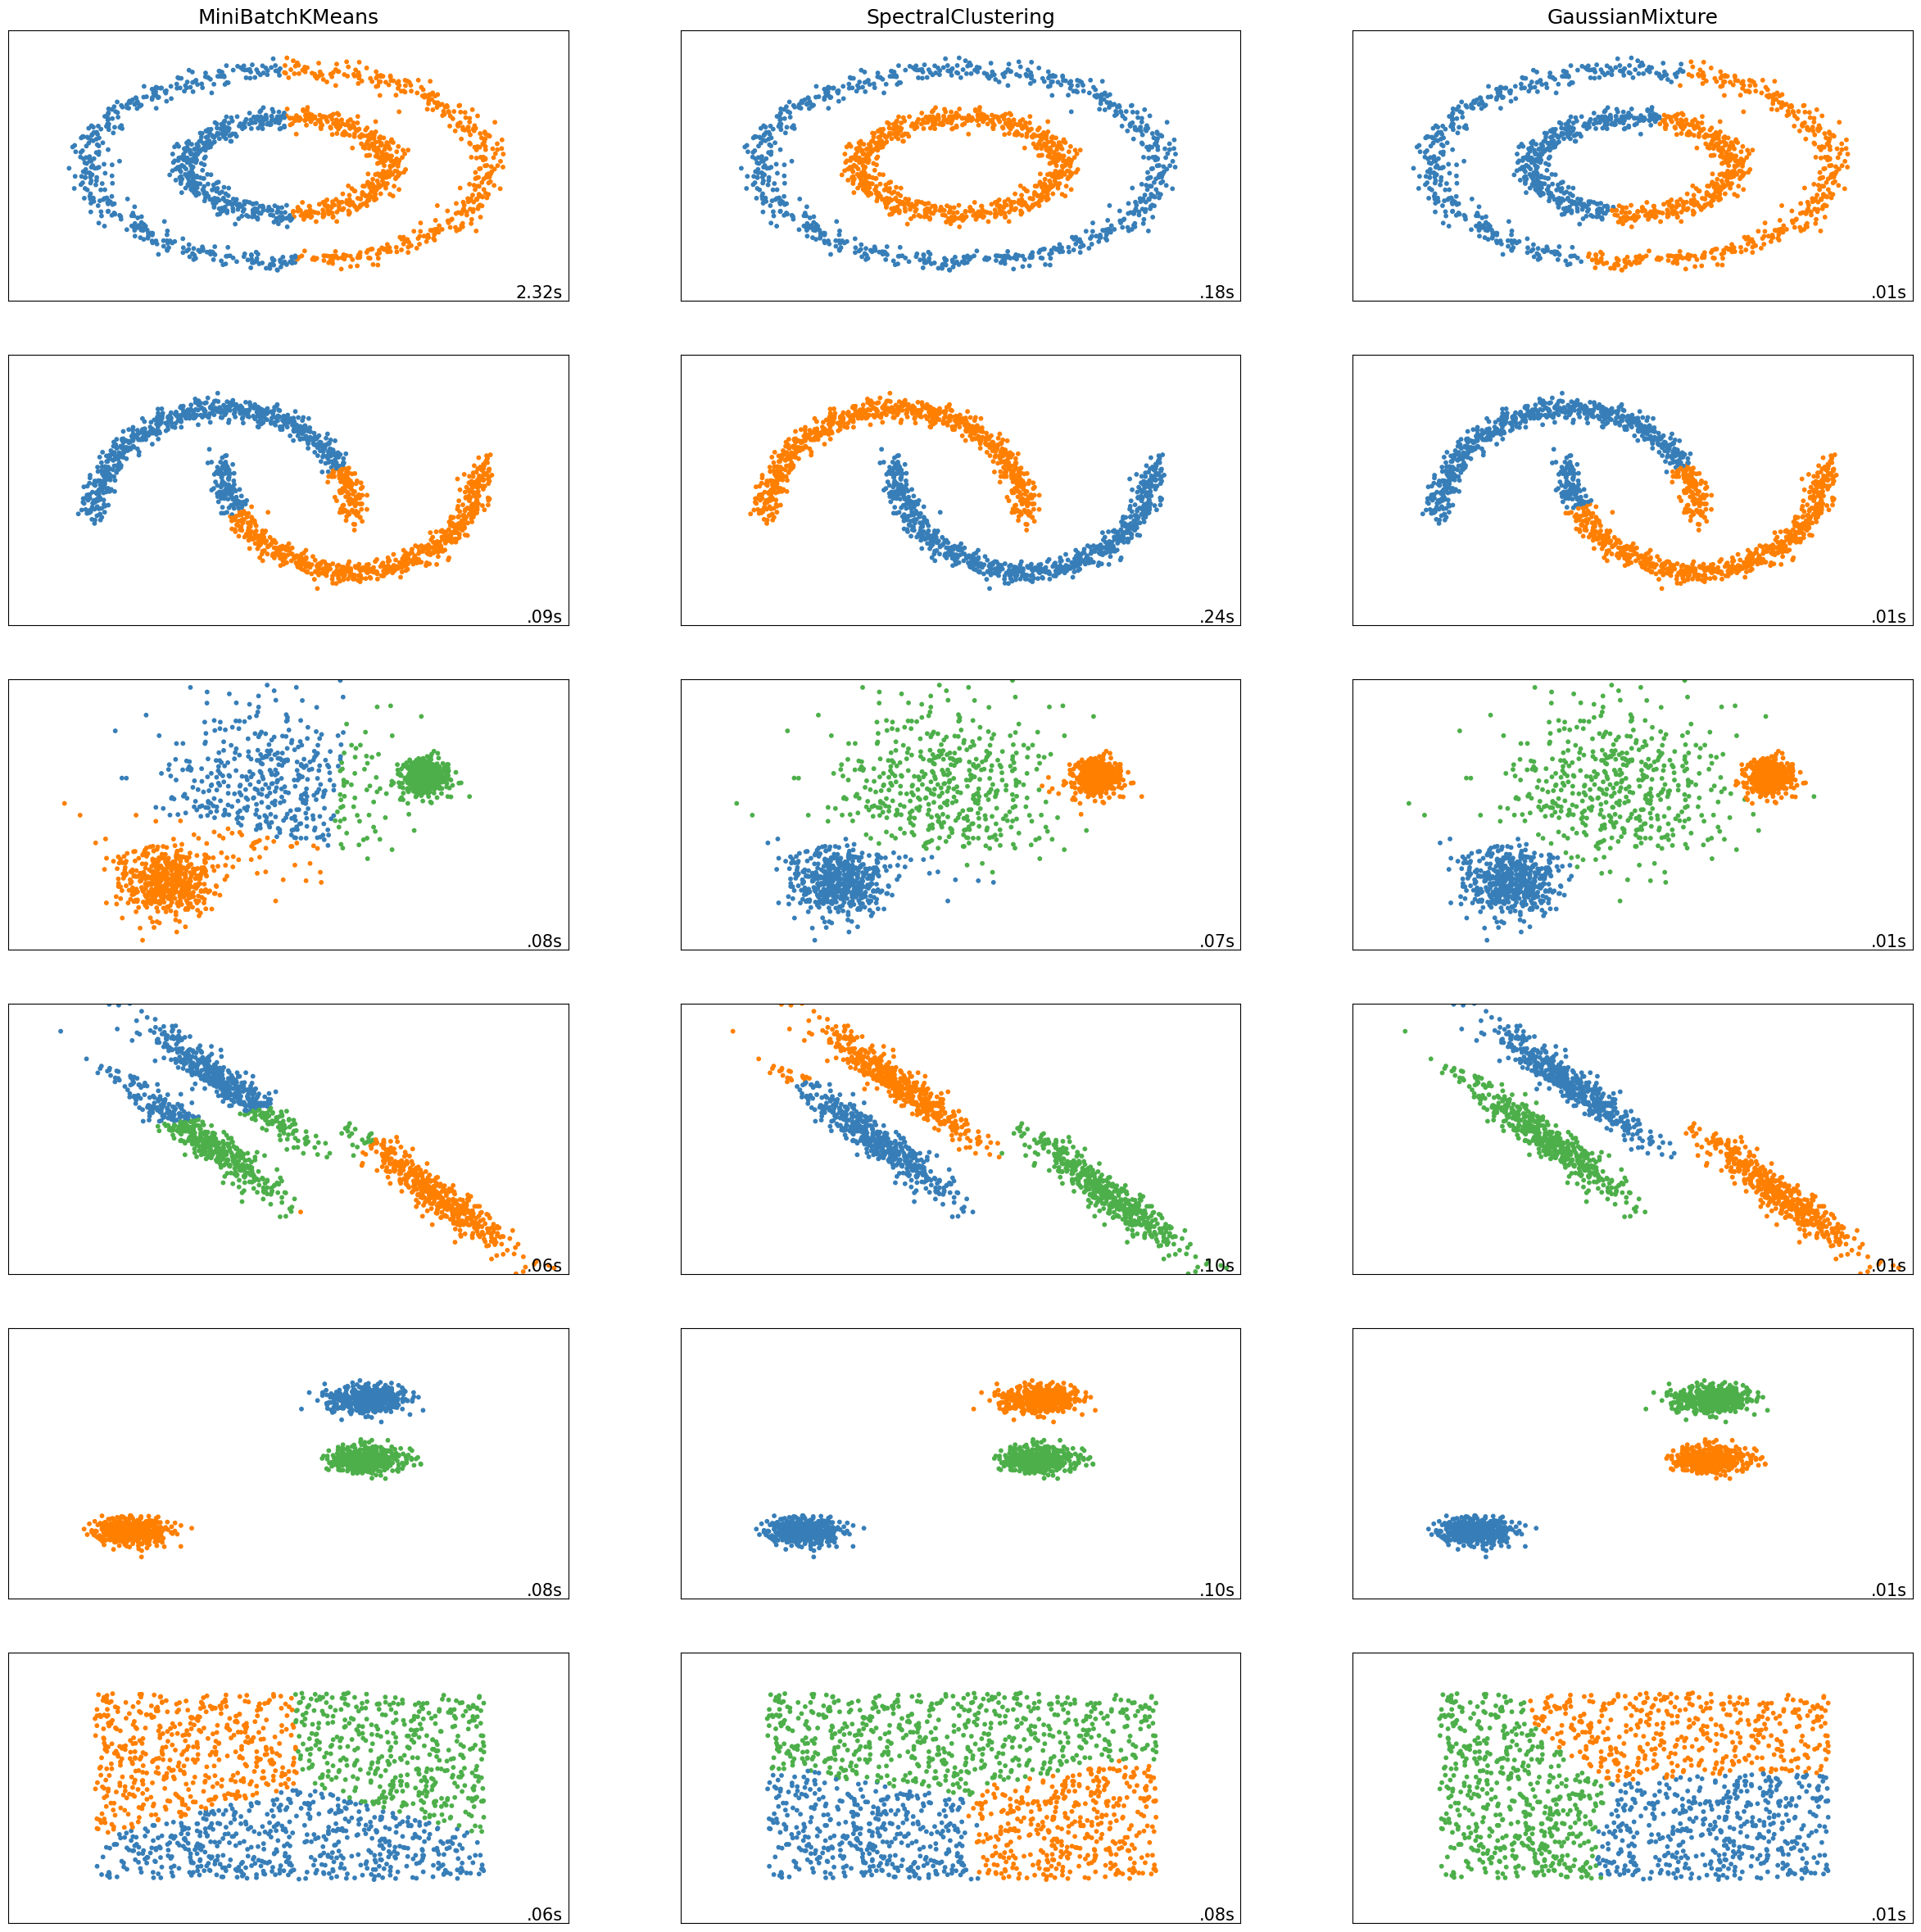

In [5]:
fig = plt.figure(figsize=(30,30))
for i_dataset, (dataset, algo_params) in enumerate(datasets_ls):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # ============
    # Create cluster objects
    # ============
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    spectral = cluster.SpectralClustering(n_clusters=params['n_clusters'], eigen_solver='arpack', affinity="nearest_neighbors")
    gmm = mixture.GaussianMixture(n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatchKMeans', two_means),
        ('SpectralClustering', spectral),
        ('GaussianMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:

        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()

        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int32)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets_ls), len(clustering_algorithms), plot_num)
        
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']), int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'), transform=plt.gca().transAxes, size=15, horizontalalignment='right')
        plot_num += 1

plt.show()

# %%
